# Customer Segmentation in Marketing with Python Project
### Qui: e-learning platform
### questioons: 
### 1- Dans quelle mesure le canal d’acquisition de la plateforme influence-t-il les résultats d’apprentissage des étudiants ?
### 2- Y a-t-il des zones géographiques où la plupart de nos étudiants découvrent la plateforme ?

In [193]:
import numpy as np
import pandas as pd

### customer_segmentation_data

In [194]:
df = pd.read_csv('customer_segmentation_data.csv')
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [195]:
df['channel'].unique()

array([4, 1, 2, 3, 8, 6, 7, 5], dtype=int64)

### Segmentation data legend

In [196]:
df1 = pd.read_excel('Segmentation data legend.xlsx')
df1.head()

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of student information of...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,minutes watched,numerical,Integer,The number of minutes a student has watched si...
4,NaN,NaN,NaN,NaN,NaN


In [197]:
df1['Unnamed: 4'].unique()

array([nan, 'Description',
       'The number of minutes a student has watched since joining the program',
       'The Customer Lifetime Value, or CLV, shows the total amount of revenue generated by that customer',
       'This is the geographical region where the student comes from.',
       'USA, Canada, United Kingdom, Australia', 'Western Europe',
       'Rest of the World',
       'This is the channel through which the customer has learned about the 365 program',
       'Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter',
       'Instagram', 'Friend', 'Other'], dtype=object)

In [198]:
df_filtered = df1[df1['Unnamed: 4'].isin(['Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter', 'Instagram','Friend'])][['Unnamed: 3', 'Unnamed: 4']]

In [199]:
df_filtered

,Unnamed: 3,Unnamed: 4
14,1,Google
15,2,Facebook
16,3,YouTube
17,4,LinkedIn
18,5,Twitter
19,6,Instagram
20,7,Friend


In [200]:
new_row = pd.DataFrame({"Unnamed: 3": [8], "Unnamed: 4": ["Other"]})
df_filtered = pd.concat([df_filtered, new_row], ignore_index=True)

df_filtered

,Unnamed: 3,Unnamed: 4
0,1,Google
1,2,Facebook
2,3,YouTube
3,4,LinkedIn
4,5,Twitter
5,6,Instagram
6,7,Friend
7,8,Other


In [201]:
df.shape

(3834, 4)

In [202]:
df.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

In [203]:
df.isna().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [204]:
df.fillna(0,inplace=True)

In [205]:
df.isna().sum()

minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

In [206]:
df.duplicated().sum()

49

In [207]:
df.drop_duplicates(inplace=True)

In [208]:
df.duplicated().sum()

0

In [209]:
df['region'].unique()

array([2, 0, 1], dtype=int64)

In [210]:
df['channel'].unique()

array([4, 1, 2, 3, 8, 6, 7, 5], dtype=int64)

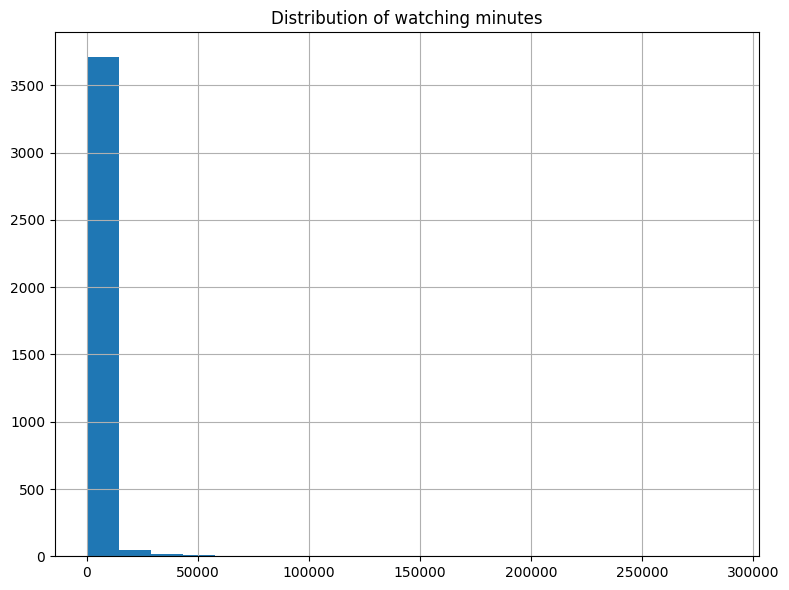

In [211]:
import matplotlib.pyplot as plt

df['minutes_watched'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of watching minutes')

plt.tight_layout()
plt.show()


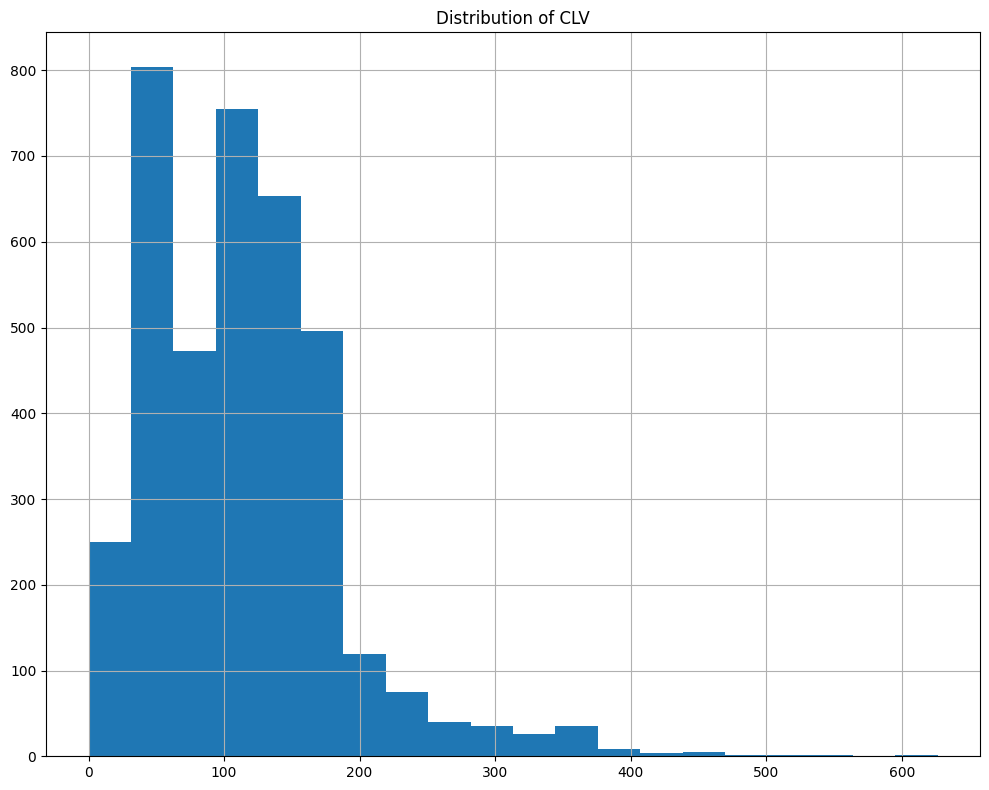

In [212]:
import matplotlib.pyplot as plt

df['CLV'].hist(bins=20, figsize=(10, 8))
plt.tight_layout()

plt.title('Distribution of CLV')

plt.tight_layout()
plt.show()
plt.show()

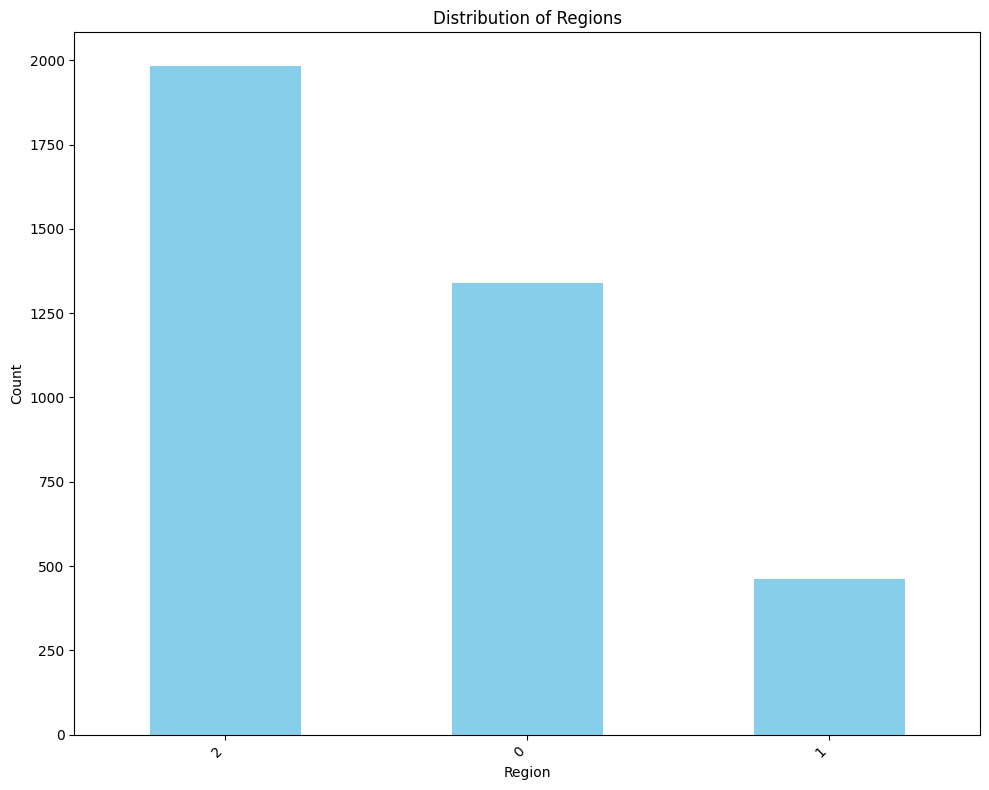

In [213]:

plt.figure(figsize=(10, 8))  
df['region'].value_counts().plot(kind='bar', color='skyblue') 

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

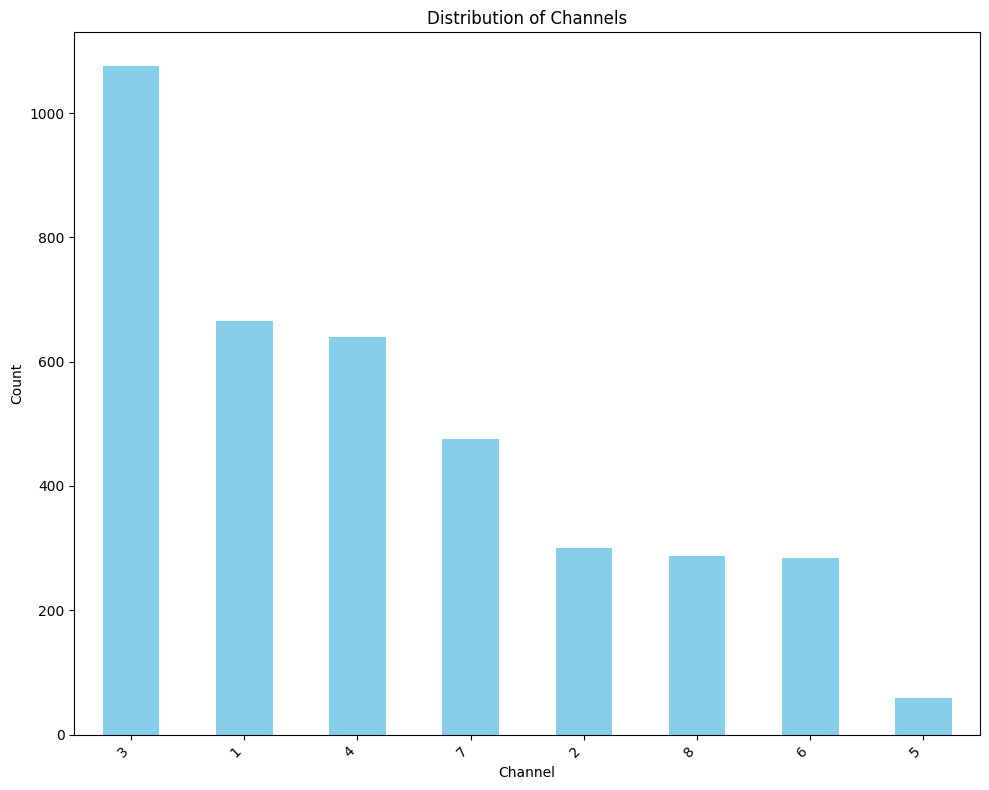

In [214]:
plt.figure(figsize=(10, 8))  
df['channel'].value_counts().plot(kind='bar', color='skyblue') 

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Distribution of Channels')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

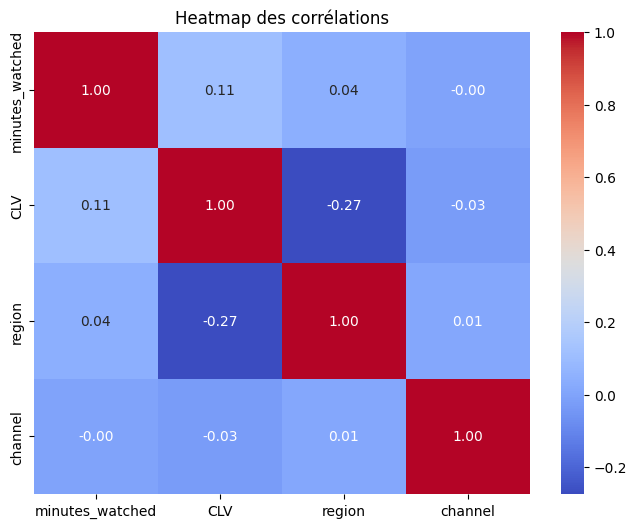

In [215]:
correlation_matrix = df.corr()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()


In [221]:
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [223]:
df[['minutes_watched', 'CLV']] = scaler.fit_transform(df[['minutes_watched', 'CLV']])

In [224]:
from sklearn.cluster import KMeans

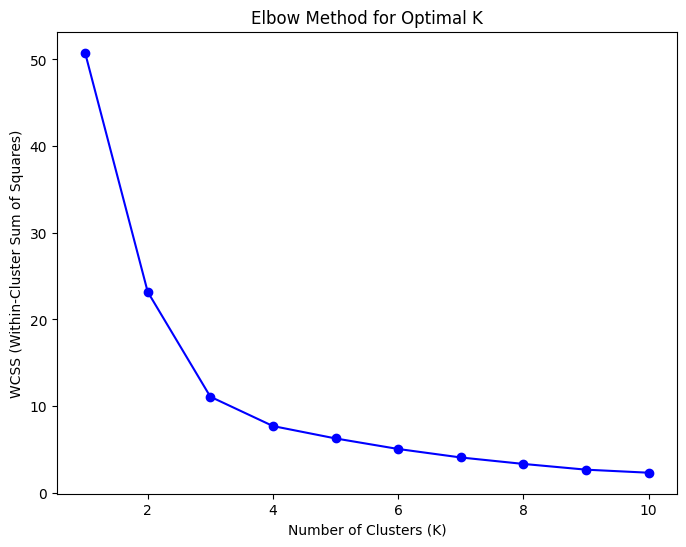

In [225]:
k_range = range(1, 11)  
wcss = []  

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['minutes_watched', 'CLV']])  
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [226]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['minutes_watched', 'CLV']])



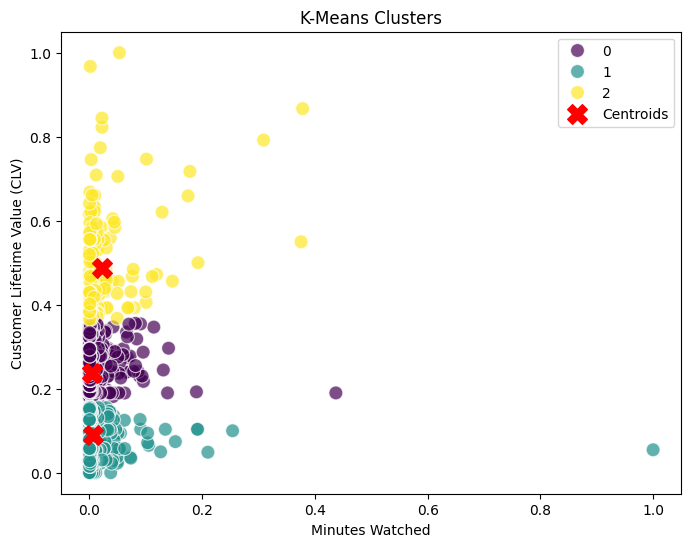

In [227]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='minutes_watched', y='CLV', hue='Cluster', palette='viridis', data=df, s=100, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clusters')
plt.xlabel('Minutes Watched')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.legend()
plt.show()

### les statistiques par cluster

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_14600\3485382091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='minutes_watched', data=df, palette='viridis')


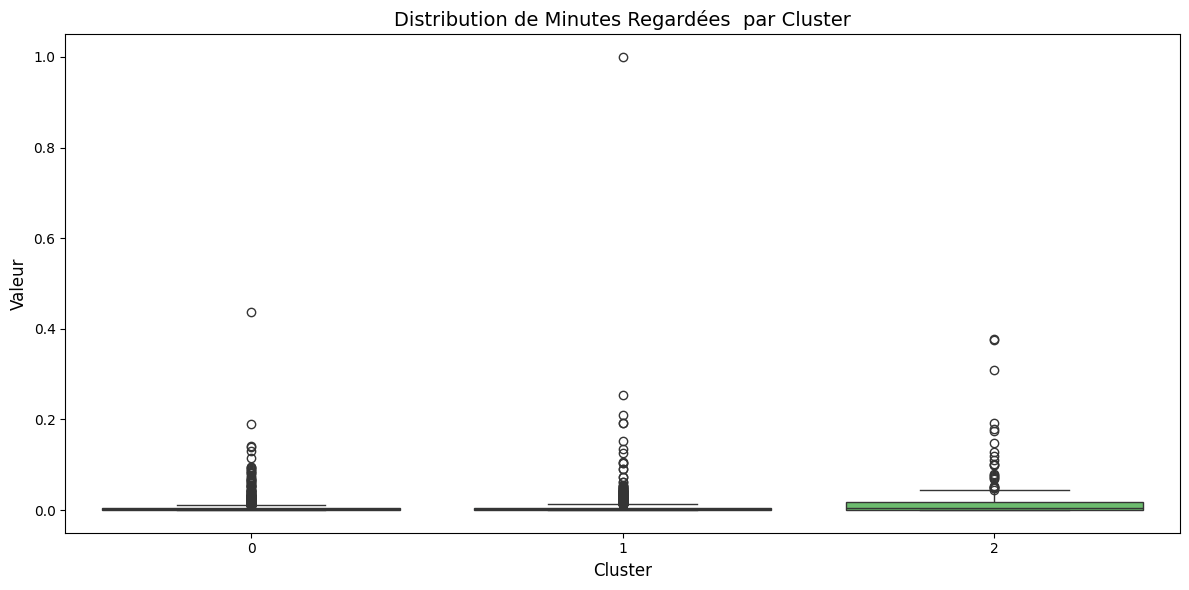

In [234]:
import seaborn as sns

# Créer un boxplot pour 'minutes_watched' et 'CLV' par cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='minutes_watched', data=df, palette='viridis')

plt.title('Distribution de Minutes Regardées  par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Valeur', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


 On observe que le cluster 2 se distingue par un nombre de minutes regardées nettement supérieur aux deux autres clusters. Les clusters 0 et 1 présentent des distributions similaires at faibles.

C:\Users\ILHAM\AppData\Local\Temp\ipykernel_14600\2677729126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CLV', data=df, palette='viridis')


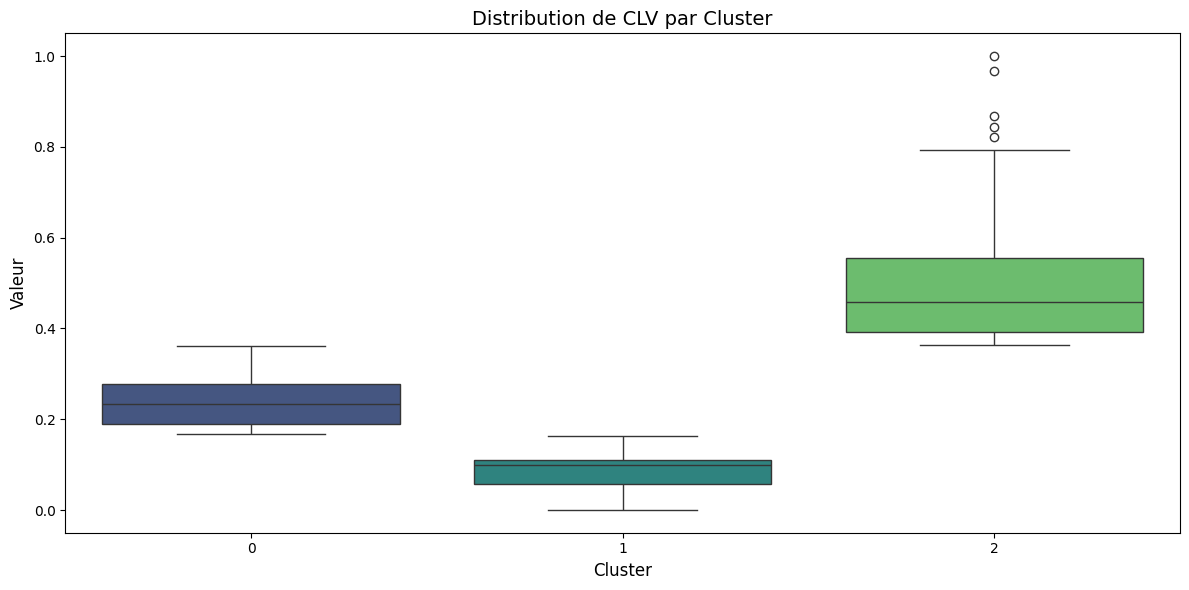

In [229]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='CLV', data=df, palette='viridis')

plt.title('Distribution de CLV par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Valeur', fontsize=12)

plt.tight_layout()
plt.show()


On observe que le cluster 2 présente une CLV moyenne nettement supérieure aux deux autres clusters. Les clusters 0 et 1 ont des CLV plus faibles et similaires, avec quelques valeurs aberrantes dans le cluster 1. Cela suggère que les clients du cluster 2 sont plus rentables pour l'entreprise.

### On déduit que le cluster 2, qui se distingue par un temps de visionnage élevé et une CLV élevée, représente un segment très intéressant à cibler avec des contenus exclusifs et des offres personnalisées.

## ldistribution des canaux dans chaque cluster

In [230]:
channel_mapping = dict(zip(df_filtered["Unnamed: 3"], df_filtered["Unnamed: 4"]))
df["channel"] = df["channel"].map(channel_mapping)
df.head()

,minutes_watched,CLV,region,channel,Cluster
0,0.011081,0.327937,2,LinkedIn,0
1,0.000218,0.239448,0,Google,0
2,0.002097,0.189974,2,Facebook,0
3,0.000069,0.383142,2,LinkedIn,2
4,0.000849,0.294317,1,LinkedIn,0


<Figure size 1000x600 with 0 Axes>

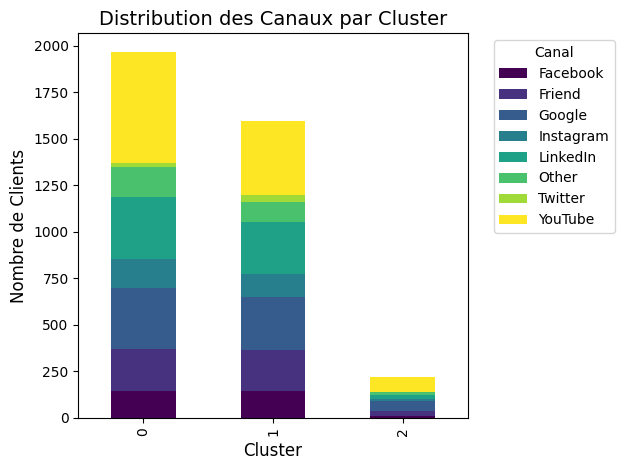

In [232]:
import seaborn as sns

channel_distribution = df.groupby('Cluster')['channel'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution des Canaux par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)

plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Le cluster 2 est principalement composé de clients qui ont interagi avec la marque via YouTube. Ce canal semble être le plus utilisé par les membres de ce groupe.Il ya une diversité dans les comportements d'utilisation des canaux numériques au sein de ce cluster mais une moindre mesure.
Le cluster 1 présente une répartition plus équilibrée des canaux d'acquisition par rapport au cluster 2.Les canaux Facebook, Google et Friend semblent être les plus populaires auprès des membres du cluster 1.Les canaux tels que YouTube, Instagram, LinkedIn et Other sont également utilisés, mais dans une moindre mesure.

<Figure size 1000x600 with 0 Axes>

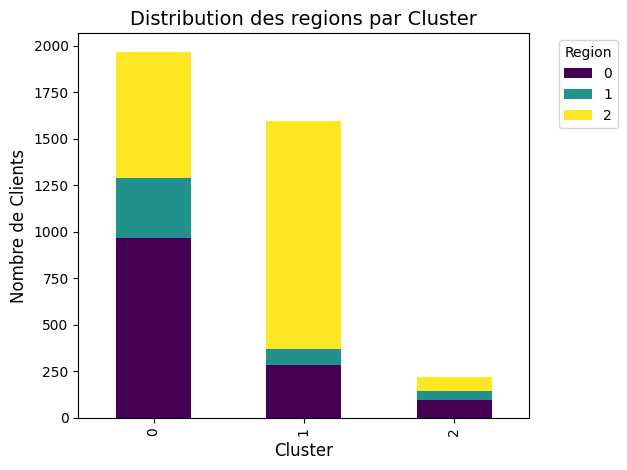

In [235]:
import seaborn as sns

channel_distribution = df.groupby('Cluster')['region'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution des regions par Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Le cluster 2 est principalement composé de clients issus de la région 0.Les autres régions, sont également présentes mais dans une moindre mesure. 
pour les cluster 0 et 1 on trouve une dominance de la région2.

# Le cluster 2, fortement lié à YouTube et à la Région 0, présente un potentiel élevé. Il serait très important que l'entreprise intensifie ces efforts sur cette plateforme (YouTube) et dans cette zone géographique.